In [3]:
import numpy as np
from skimage import io

from skimage.filters import threshold_otsu, threshold_yen, threshold_local
from skimage.color import rgb2gray
from scipy.ndimage.morphology import binary_fill_holes
from skimage.segmentation import clear_border
from skimage.morphology import binary_dilation
from skimage.measure import label


import matplotlib.pyplot as plt

import warnings

In [65]:
PATH = 'data/'

def read_img(name):
    path_img = PATH + name
    img = io.imread(path_img)
    return img

def binarize(img, plot=True):   
    binary_img = rgb2gray(img) 
    binary_img = binary_img < threshold_yen(binary_img)
    #binary_img = binary_fill_holes(binary_img)
    if plot:
        io.imshow(binary_img)
        plt.title('binarized')
        plt.show()
    return binary_img

def remove_noize(img_bin):
    img_cl_borders = clear_border(img_bin)
    img_eros_1 = binary_dilation(img_cl_borders)
    img_eros_2 = binary_dilation(img_eros_1)
    img_eros_3 = binary_dilation(img_eros_2)
    return img_eros_3

def num_pixels_of_figure(img_no_noize):
    labels = label(img_no_noize)
    res = np.unique(labels, return_counts=True)
    return np.sort(res[1])[-2]

def get_num_holes(img_no_noize, threshold_num):
    img_inv = np.invert(img_no_noize)
    labels = label(img_inv)
    num_pixels_in_holes = np.unique(labels, return_counts=True)[1][1:]
    num_in_holes = num_pixels_in_holes[num_pixels_in_holes>threshold_num][1:]
    num_holes = num_in_holes.shape[0]
    return num_holes, num_in_holes
    
def detect_figure(img, verbose=True):
    img_bin = binarize(img, False)
    img_no_noize = remove_noize(img_bin)
    num_pixels_of_figure(img_no_noize)
 
    if verbose:
        io.imshow(img_bin)
        plt.title('binarized')
        plt.show()
        
        io.imshow(img_no_noize)
        plt.title('no noize')
        plt.show()
    
    num_holes, num_in_holes = get_num_holes(img_no_noize, 1250)

    if num_holes == 4:
        answer = 1
    elif num_holes == 5:
        answer = 3
    elif num_holes == 2:
        if (num_in_holes > 30000).all():
            answer = 4
        else:
            answer = 2
    else:
        answer = 0

    if verbose:
        print('Количесвто дырок в фигуре:', num_holes)
        print('Количесвто пикселей в дырках фигуры: ')
        print(num_in_holes)
    return answer
    


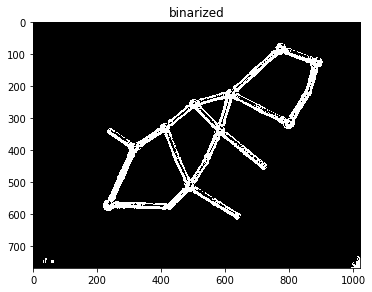

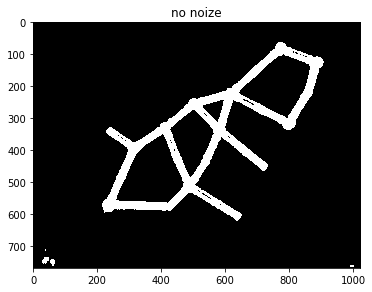

Количесвто дырок в фигуре: 4
Количесвто пикселей в дырках фигуры: 
[25035  2346 15778 27709]
1


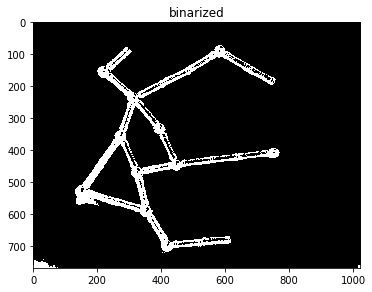

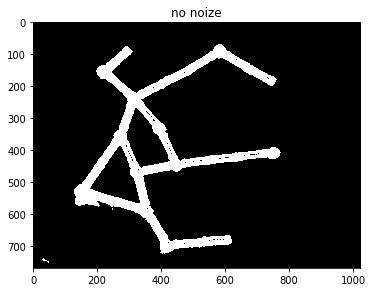

Количесвто дырок в фигуре: 2
Количесвто пикселей в дырках фигуры: 
[13826 14036]
2


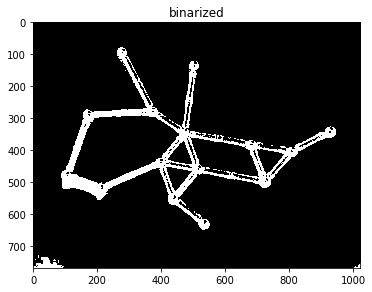

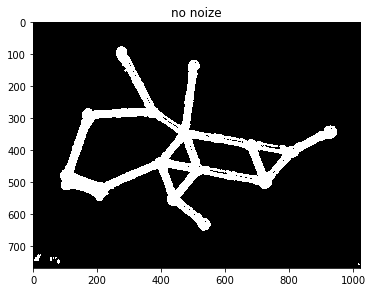

Количесвто дырок в фигуре: 5
Количесвто пикселей в дырках фигуры: 
[44848 14188  2380  2829  2457]
3


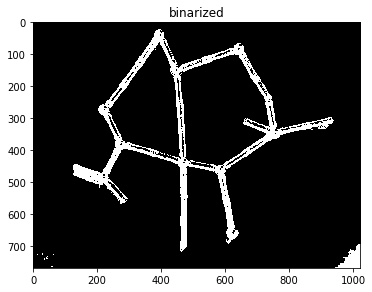

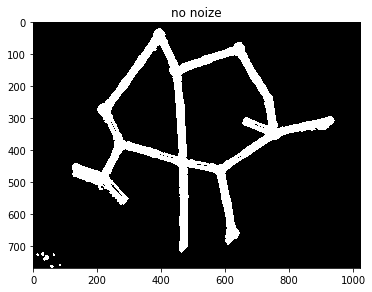

Количесвто дырок в фигуре: 2
Количесвто пикселей в дырках фигуры: 
[45098 66498]
4


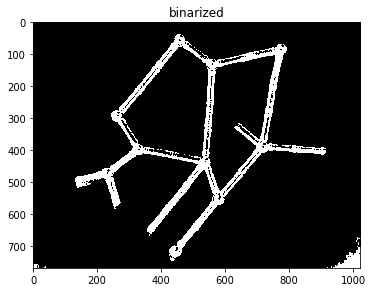

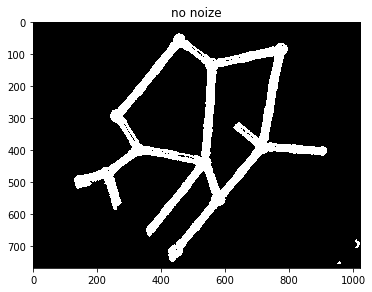

Количесвто дырок в фигуре: 2
Количесвто пикселей в дырках фигуры: 
[58007 50699]
4


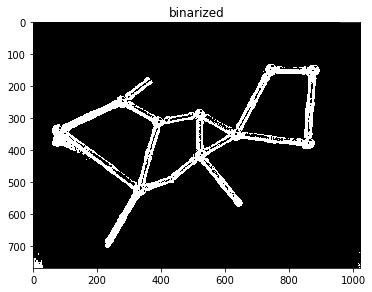

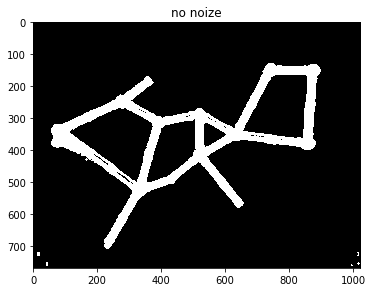

Количесвто дырок в фигуре: 4
Количесвто пикселей в дырках фигуры: 
[28249 31729 18434  2948]
1


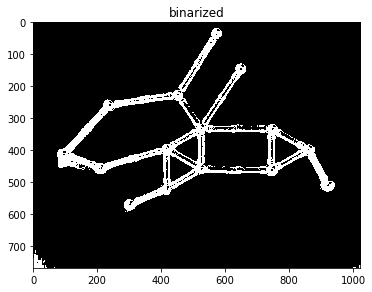

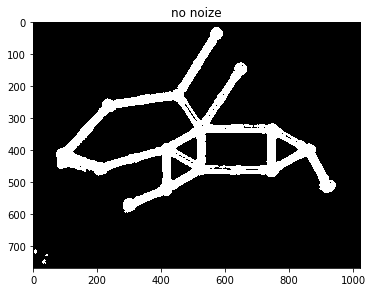

Количесвто дырок в фигуре: 5
Количесвто пикселей в дырках фигуры: 
[43274 19658  2646  3043  2701]
3


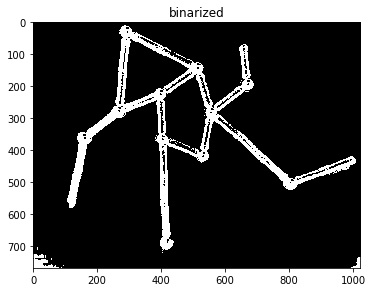

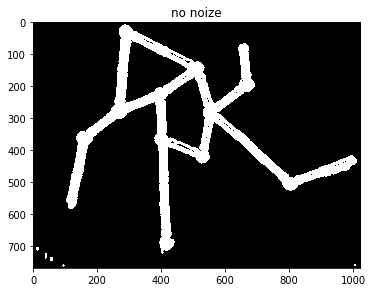

Количесвто дырок в фигуре: 2
Количесвто пикселей в дырках фигуры: 
[20109 20019]
2


In [64]:
for i in [2, 3, 4, 5, 7, 13, 19, 25]:
    img = read_img(str(i)+'.jpg')    
    print(detect_figure(img))

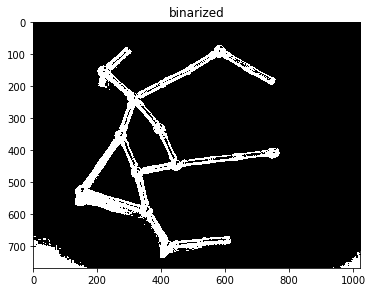

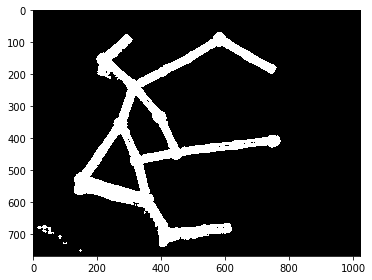

79946

In [37]:
img = read_img('3.jpg')
img_bin = binarize(img)

img_no_noize = remove_noize(img_bin)
io.imshow(img_no_noize)
plt.show()

num_pixels_of_figure(img_no_noize)